In [2]:
from scipy.optimize import linprog
import numpy as np

# import random
import matplotlib.pyplot as plt


In [3]:
def plot_price_curve(price_curve: list):
    import matplotlib.pyplot as plt

    plt.step(range(24), price_curve)
    plt.xlabel("Hour")
    plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=45)
    plt.ylabel("NOK per kWh")
    plt.title("Generated price curve for a day")
    plt.ylim(0)
    plt.show()


def plot_price_curve_vs_usage(price_curve: list, usage: list) -> None:
    """Plot the price curve and the usage curve in the same graph

    Args:
        price_curve: list of float, the price curve in NOK per kWh
        usage: list of float, the usage in kWh for each hour. Example: [(10, 5.5)] for 5.5 kWh at 10:00am

    Returns:
        None
    """

    # plotting the optimal power usage against the price curve
    plt.step(range(24), price_curve, label="Price curve (NOK/kWh)")
    plt.step(range(24), usage, label="Optimal power usage (kWh)")
    plt.xlabel("Hour")
    # xticks are the hours of the day formatted hour
    plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=45)

    plt.title("Optimal power usage vs. price curve")
    plt.legend()
    # make sure legend is not overlapping with the graph
    plt.tight_layout()
    plt.show()


# Question 1


In [26]:
# Constants
peak_cost = 1  # dollars per kWh during peak hours
non_peak_cost = 0.5  # dollars per kWh during non-peak hours
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm

# Power requirements for each applicant (in kWh)
power_requirements = [1.94, 9.9, 1.44]  # Laundry machine  # EV charger  # Dishwasher

# Objective function coefficients (cost per kWh)
costs = [non_peak_cost if hour not in peak_hours else peak_cost for hour in range(24)]

# Construct the constraint matrix (each row represents an applicant's power usage)
A_eq = np.zeros((4, 24))  # 4 rows for each applicant and one for the total power usage
for i in range(3):
    A_eq[i, i * 8 : (i + 1) * 8] = (
        1  # Assign 1 to the corresponding hours for each applicant
    )
A_eq[3, :] = 1  # Total power usage constraint

# Define the right-hand side vector (power requirements)
b_eq = power_requirements + [
    sum(power_requirements)
]  # Power requirements for each applicant and total power requirement

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# Extract the optimal power usage
optimal_usage = result.x

# plot_price_curve(costs)
# plot_price_curve_vs_usage(costs, optimal_usage)

# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", result.fun, "dollars")


Optimal power usage for each hour:
Hour 0: 1.94 kWh
Hour 1: 0.00 kWh
Hour 2: 0.00 kWh
Hour 3: 0.00 kWh
Hour 4: 0.00 kWh
Hour 5: 0.00 kWh
Hour 6: 0.00 kWh
Hour 7: 0.00 kWh
Hour 8: 9.90 kWh
Hour 9: 0.00 kWh
Hour 10: 0.00 kWh
Hour 11: 0.00 kWh
Hour 12: 0.00 kWh
Hour 13: 0.00 kWh
Hour 14: 0.00 kWh
Hour 15: 0.00 kWh
Hour 16: 1.44 kWh
Hour 17: 0.00 kWh
Hour 18: 0.00 kWh
Hour 19: 0.00 kWh
Hour 20: 0.00 kWh
Hour 21: 0.00 kWh
Hour 22: 0.00 kWh
Hour 23: 0.00 kWh
Total cost: 6.64 dollars


In [32]:
print(A_eq)
print(b_eq)
print(A_eq.shape)
print(len(b_eq))


[[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[1.94, 9.9, 1.44, 13.28]
(4, 24)
4


# Question 2


## Generating price curve (RTP)


In [6]:
def generate_price_curve_RTP(peak_hours: list) -> list:
    """Generate a random real-time price curve for a day

    Returns:
        list of float: the price curve in NOK per kWh
    """
    import random

    random.seed(6)
    price_curve = [
        random.uniform(1, 1.5) if i in peak_hours else random.uniform(0.6, 0.7)
        for i in range(24)
    ]

    return price_curve


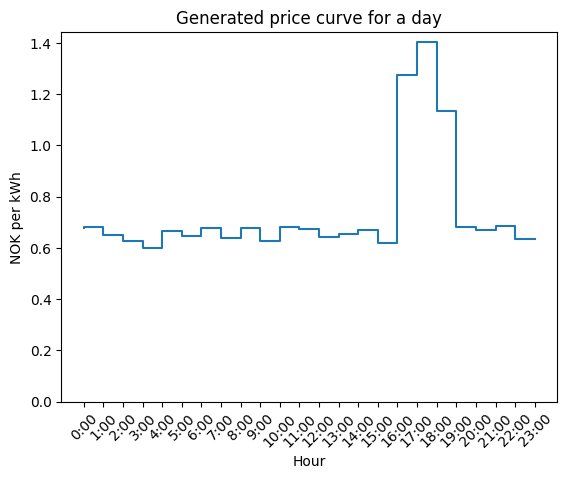

Real-time price for each hour:
Hour 0: 0.68 kWh
Hour 1: 0.68 kWh
Hour 2: 0.65 kWh
Hour 3: 0.63 kWh
Hour 4: 0.60 kWh
Hour 5: 0.67 kWh
Hour 6: 0.65 kWh
Hour 7: 0.68 kWh
Hour 8: 0.64 kWh
Hour 9: 0.68 kWh
Hour 10: 0.63 kWh
Hour 11: 0.68 kWh
Hour 12: 0.67 kWh
Hour 13: 0.64 kWh
Hour 14: 0.65 kWh
Hour 15: 0.67 kWh
Hour 16: 0.62 kWh
Hour 17: 1.28 kWh
Hour 18: 1.40 kWh
Hour 19: 1.13 kWh
Hour 20: 0.68 kWh
Hour 21: 0.67 kWh
Hour 22: 0.68 kWh
Hour 23: 0.63 kWh


In [7]:
plot_price_curve(generate_price_curve_RTP(peak_hours))
print(f"Real-time price for each hour:")
for hour, price in enumerate(generate_price_curve_RTP(peak_hours)):
    print(f"Hour {hour}: {price:.2f} kWh")


## Appliances


In [8]:
# Constants
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm
# Power requirements and time constraints for each appliance
appliances = [
    # non-shiftable loads
    {"power": 2, "hours": range(10, 20)},  # Lighting
    {"power": 9.6, "hours": range(0, 23)},  # Heating
    {"power": 1.32, "hours": range(0, 23)},  # Refrigerator
    {
        "power": 3.9,
        "hours": [8, 9, 11, 12, 17, 18],
    },  # Stove
    {"power": 0.6, "hours": range(17, 22)},  # TV
    {"power": 0.6, "hours": range(17, 22)},  # Computer
    {"power": 0.144, "hours": range(0, 23)},  # Router
    {"power": 0.84, "hours": range(0, 23)},  # Separate freezer
    {"power": 1.2, "hours": range(17, 18)},  # Microwave
    # shiftable loads
    {"power": 1.44, "hours": range(24)},  # Dishwasher
    {"power": 1.94, "hours": range(24)},  # Laundry machine
    {"power": 1.44, "hours": range(24)},  # Dryer
    {"power": 9.9, "hours": range(24)},  # EV
]

non_shiftable_appliances = appliances[:9]
shiftable_appliances = appliances[9:]


## Plotting code q2


The lowest price of the day is 0.6000451714885071 NOK/kWh at 4:00


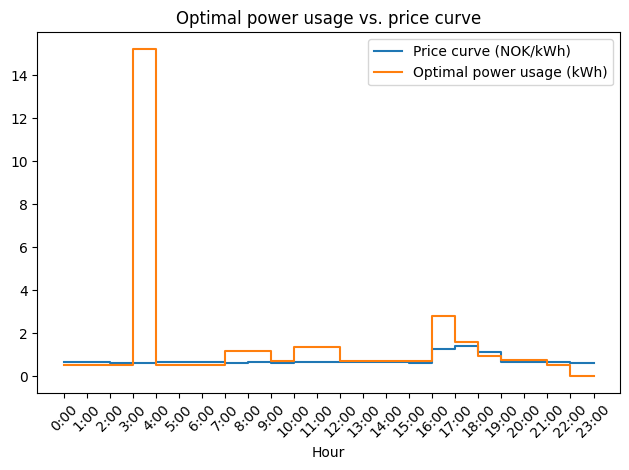

Optimal power usage for each hour:
Hour 0: 0.52 kWh
Hour 1: 0.52 kWh
Hour 2: 0.52 kWh
Hour 3: 0.52 kWh
Hour 4: 15.24 kWh
Hour 5: 0.52 kWh
Hour 6: 0.52 kWh
Hour 7: 0.52 kWh
Hour 8: 1.17 kWh
Hour 9: 1.17 kWh
Hour 10: 0.72 kWh
Hour 11: 1.37 kWh
Hour 12: 1.37 kWh
Hour 13: 0.72 kWh
Hour 14: 0.72 kWh
Hour 15: 0.72 kWh
Hour 16: 0.72 kWh
Hour 17: 2.81 kWh
Hour 18: 1.61 kWh
Hour 19: 0.96 kWh
Hour 20: 0.76 kWh
Hour 21: 0.76 kWh
Hour 22: 0.52 kWh
Hour 23: 0.00 kWh
Total cost: 25.525962744198107 NOK


In [78]:
# Generate a random real-time price curve for a day
costs = generate_price_curve_RTP(peak_hours)

# Get the lowest priced hour of the day
lowest_price = min(costs)
lowest_price_hour = costs.index(lowest_price)

print(
    f"The lowest price of the day is {lowest_price} NOK/kWh at {lowest_price_hour}:00"
)

# Initialize the optimal power usage for each hour
optimal_usage = [0] * 24

# Get the power requirements for the shiftable appliances
shiftable_power_requirements = [
    appliance["power"] for appliance in shiftable_appliances
]


# Distribute the power requirements for the shiftable appliances to the lowest price hour
optimal_usage[lowest_price_hour] = sum(shiftable_power_requirements)


# Distribute the power requirements to the non-shiftable applicants
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"])

plot_price_curve_vs_usage(costs, optimal_usage)
print(f"Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", sum([costs[i] * usage for i, usage in enumerate(optimal_usage)]), "NOK")


## Optimization q2


In [10]:
# Trivial Linear programming problem

c = [1, 4]
A_eq = [[3, 1], [1, 2]]
b_eq = [6, 4]

x0_bounds = (None, None)
x1_bounds = (-3, None)

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds])
print(result)


           con: array([0., 0.])
 crossover_nit: 0
         eqlin:  marginals: array([-0.4,  2.2])
  residual: array([0., 0.])
           fun: 6.399999999999997
       ineqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
         lower:  marginals: array([0., 0.])
  residual: array([inf, 4.2])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 0
         slack: array([], dtype=float64)
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([1.6, 1.2])


## Simplest solution

Optimize the sum


(1, 24)
14.72


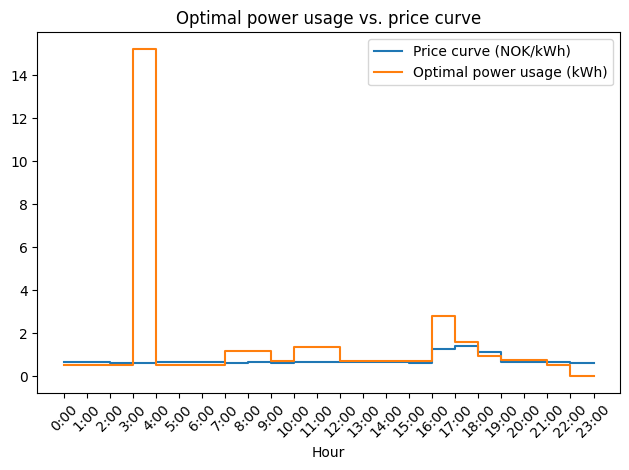

Optimal power usage for each hour:
Hour 0: 0.52 kWh
Hour 1: 0.52 kWh
Hour 2: 0.52 kWh
Hour 3: 0.52 kWh
Hour 4: 15.24 kWh
Hour 5: 0.52 kWh
Hour 6: 0.52 kWh
Hour 7: 0.52 kWh
Hour 8: 1.17 kWh
Hour 9: 1.17 kWh
Hour 10: 0.72 kWh
Hour 11: 1.37 kWh
Hour 12: 1.37 kWh
Hour 13: 0.72 kWh
Hour 14: 0.72 kWh
Hour 15: 0.72 kWh
Hour 16: 0.72 kWh
Hour 17: 2.81 kWh
Hour 18: 1.61 kWh
Hour 19: 0.96 kWh
Hour 20: 0.76 kWh
Hour 21: 0.76 kWh
Hour 22: 0.52 kWh
Hour 23: 0.00 kWh
Total cost: 25.525962744198107 NOK


In [79]:
RTP_costs = generate_price_curve_RTP(peak_hours)
e = np.ones((24, 1))
p = sum([appliance["power"] for appliance in shiftable_appliances])

print(e.T.shape)
print(p)

result = linprog(RTP_costs, A_eq=e.T, b_eq=p)
# print(result)
# Extract the optimal power usage
optimal_usage = result.x

# add non-shiftable appliances to the optimal_usage
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"])


plot_price_curve_vs_usage(RTP_costs, optimal_usage)
# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print(
    "Total cost:",
    sum([costs[i] * usage for i, usage in enumerate(optimal_usage)]),
    "NOK",
)


## Optimize for each appliance


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0.67933401 0.6821954  0.64850346 0.62616215 0.60004517 0.66628186
 0.64702543 0.67597306 0.63731604 0.67701398 0.62726981 0.68019155
 0.67298248 0.64140064 0.65383052 0.66820517 0.61929849 1.27680758
 1.40256202 1.13276053 0.68033653 0.66856899 0.68442823 0.6335582 ]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  

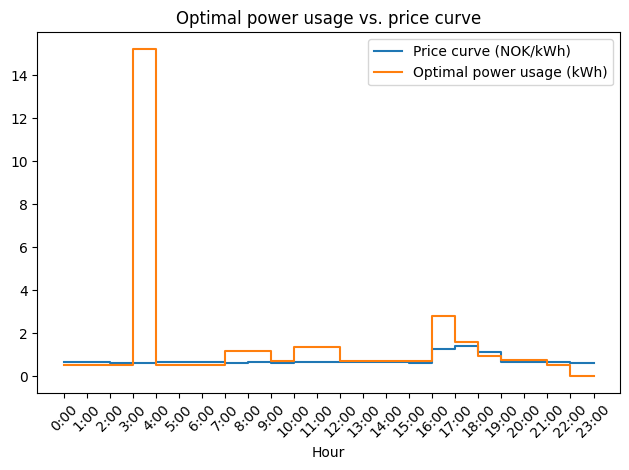

Optimal power usage for each hour:
Hour 0: 0.52 kWh
Hour 1: 0.52 kWh
Hour 2: 0.52 kWh
Hour 3: 0.52 kWh
Hour 4: 15.24 kWh
Hour 5: 0.52 kWh
Hour 6: 0.52 kWh
Hour 7: 0.52 kWh
Hour 8: 1.17 kWh
Hour 9: 1.17 kWh
Hour 10: 0.72 kWh
Hour 11: 1.37 kWh
Hour 12: 1.37 kWh
Hour 13: 0.72 kWh
Hour 14: 0.72 kWh
Hour 15: 0.72 kWh
Hour 16: 0.72 kWh
Hour 17: 2.81 kWh
Hour 18: 1.61 kWh
Hour 19: 0.96 kWh
Hour 20: 0.76 kWh
Hour 21: 0.76 kWh
Hour 22: 0.52 kWh
Hour 23: 0.00 kWh
Total cost: 25.525962744198107 NOK


In [81]:
RTP_costs = np.array(generate_price_curve_RTP(peak_hours))
p = np.array([appliance["power"] for appliance in shiftable_appliances])
costs = np.tile(RTP_costs, len(p))
# e = np.ones((24, 4))
A_eq = np.kron(np.eye(len(p)), np.ones((1, 24)))

# print(f"Shape of RTP_costs = {RTP_costs.shape}, e.T = {e.T.shape} and p = {p.shape}")
print(np.eye(len(p)))
print(RTP_costs)
print(A_eq)
print(p)

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=p)

print(result.x)

# Extract the optimal power usage and reshape it to get the usage for each appliance at each hour
optimal_usage = result.x.reshape(-1, 24)

# print(optimal_usage)

# sum the power usage for each hour
optimal_usage = np.sum(optimal_usage, axis=0)

# add non-shiftable appliances to the optimal_usage
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"])

plot_price_curve_vs_usage(RTP_costs, optimal_usage)
# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print(
    "Total cost:",
    sum([costs[i] * usage for i, usage in enumerate(optimal_usage)]),
    "NOK",
)


## Linprog using loop

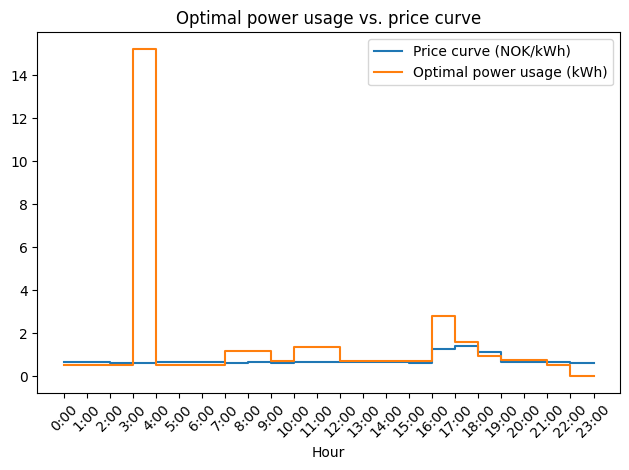

Optimal power usage for each hour:
Hour 0: 0.52 kWh
Hour 1: 0.52 kWh
Hour 2: 0.52 kWh
Hour 3: 0.52 kWh
Hour 4: 15.24 kWh
Hour 5: 0.52 kWh
Hour 6: 0.52 kWh
Hour 7: 0.52 kWh
Hour 8: 1.17 kWh
Hour 9: 1.17 kWh
Hour 10: 0.72 kWh
Hour 11: 1.37 kWh
Hour 12: 1.37 kWh
Hour 13: 0.72 kWh
Hour 14: 0.72 kWh
Hour 15: 0.72 kWh
Hour 16: 0.72 kWh
Hour 17: 2.81 kWh
Hour 18: 1.61 kWh
Hour 19: 0.96 kWh
Hour 20: 0.76 kWh
Hour 21: 0.76 kWh
Hour 22: 0.52 kWh
Hour 23: 0.00 kWh
Total cost: 25.525962744198107 NOK


In [82]:
RTP_costs = np.array(generate_price_curve_RTP(peak_hours))
p = np.array([appliance["power"] for appliance in shiftable_appliances])
# Initialize an array to store the optimal usage for each hour
optimal_usage = np.zeros_like(RTP_costs)

# For each shiftable appliance
for i, appliance_power in enumerate(p):
    # Create a binary vector for the constraints
    e = np.ones((1, 24))

    # Solve the linear programming problem for this appliance
    result = linprog(RTP_costs, A_eq=e, b_eq=np.array([appliance_power]))

    # Add the optimal usage for this appliance to the total optimal usage
    optimal_usage += result.x

# Add non-shiftable appliances to the optimal_usage
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"])

plot_price_curve_vs_usage(RTP_costs, optimal_usage)
# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print(
    "Total cost:",
    sum([costs[i] * usage for i, usage in enumerate(optimal_usage)]),
    "NOK",
)


# Question 3


## Plotting code


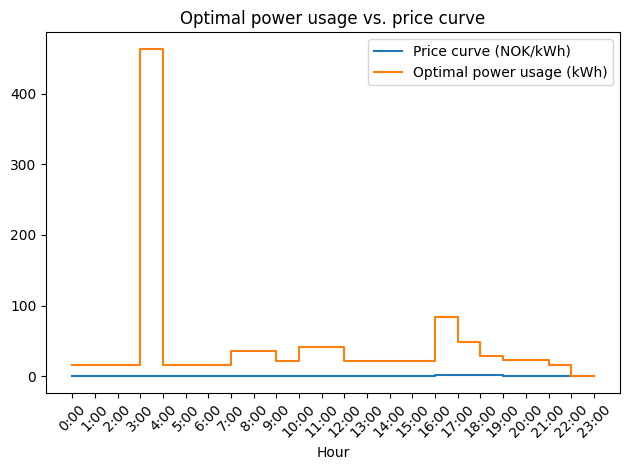

Optimal power usage for each hour:
Hour 0: 15.53 kWh
Hour 1: 15.53 kWh
Hour 2: 15.53 kWh
Hour 3: 15.53 kWh
Hour 4: 463.43 kWh
Hour 5: 15.53 kWh
Hour 6: 15.53 kWh
Hour 7: 15.53 kWh
Hour 8: 35.03 kWh
Hour 9: 35.03 kWh
Hour 10: 21.53 kWh
Hour 11: 41.03 kWh
Hour 12: 41.03 kWh
Hour 13: 21.53 kWh
Hour 14: 21.53 kWh
Hour 15: 21.53 kWh
Hour 16: 21.53 kWh
Hour 17: 84.23 kWh
Hour 18: 48.23 kWh
Hour 19: 28.73 kWh
Hour 20: 22.73 kWh
Hour 21: 22.73 kWh
Hour 22: 15.53 kWh
Hour 23: 0.00 kWh


In [12]:
optimal_usage = [0] * 24

# power_requirements for the shiftable applicants excluding EV
EV_power_requirement = shiftable_appliances[-1]["power"]
shiftable_power_requirements = [
    appliance["power"] for appliance in shiftable_appliances[:-1]
]


# Distribute the power requirements to the lowest price hour
optimal_usage[lowest_price_hour] = (
    sum(power_requirements) * 30 + EV_power_requirement * 5
)

# Distribute the power requirements to the non-shiftable applicants
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"]) * 30


plot_price_curve_vs_usage(costs, optimal_usage)
print(f"Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")


# Question 4


In [13]:
# Constants
total_power_limit = 2  # Maximum total power usage per hour


# Objective function coefficients (cost per kWh)
costs = generate_price_curve_RTP(peak_hours)

# Construct the constraint matrix (each row represents an hour)
A_eq = np.zeros((24, 24))
for hour in range(24):
    for applicant in applicants:
        if hour in applicant["hours"]:
            A_eq[hour, hour] += 1  # Increment power usage for the corresponding hour

# Define the right-hand side vector (power requirements)
b_eq = [total_power_limit] * 24  # Total power usage limit for each hour

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# Extract the optimal power usage
optimal_usage = result.x

plot_price_curve_vs_usage(costs, optimal_usage)

# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", result.fun, "dollars")


NameError: name 'applicants' is not defined

In [ ]:
print(A_eq)
print(b_eq)


[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.